## Model evaluation using pyaerocom

After this introduction, you will know how to:

- **Search** for model and observation data in the provided database
- **Read** model and observation data 
- **Explore** the data (`GriddedData` and `UngriddedData`)
- **Colocate** data and assess model performance (`ColocatedData`)
- **Convert** from pyaerocom to other common libraries such as `pandas` or `xarray`
- **Store** intermediate results as NetCDF that may be used for further analysis.

### Pyaerocom API 

![API](pyaerocom_basic_flowchart.png)

### Get started

In [1]:
import pyaerocom as pya
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
pya.change_verbosity('critical', log=pya.const.print_log) # don't output warnings
pya.__version__

'0.8.1.dev3'

Please make sure to use version **0.8.1.dev2** (or later). If you have an earlier version, follow [these instructions](https://github.com/NordicESMhub/NEGI-Abisko-2019/blob/master/content/training/pyaerocom/local_pyaerocom.md) in order to update your installation.

#### Change basic data directory to location of *pyaerocom-testdata*

In [2]:
import socket
if socket.gethostname() == 'pc4971':
    print('I am on Jonas PC')
    DATA_BASEDIR = '/home/jonasg/MyPyaerocom/pyaerocom-testdata'
else:
    print('I assume I am on the Abisko Jupyter hub')
    DATA_BASEDIR = '/home/notebook/shared-ns1000k/inputs/pyaerocom-testdata/'

I assume I am on the Abisko Jupyter hub


In [3]:
pya.const.BASEDIR = DATA_BASEDIR
pya.const.BASEDIR

'/home/notebook/shared-ns1000k/inputs/pyaerocom-testdata/'

### Searching for available data in pyaerocom-testdata (method `browse_database`)

In [4]:
pya.browse_database('*TM5*')


Pyaerocom ReadGridded
---------------------
Data ID: TM5_AP3-CTRL2019
Data directory: /home/notebook/shared-ns1000k/inputs/pyaerocom-testdata/modeldata/TM5_AP3-CTRL2019/renamed
Available experiments: ['AP3-CTRL2019']
Available years: [2010]
Available frequencies ['monthly']
Available variables: ['abs350aer', 'abs440aer', 'abs440dryaer', 'abs550aer', 'abs550dryaer', 'abs550drylt1aer', 'abs870aer', 'abs870dryaer', 'airmass', 'asyaer', 'asydryaer', 'depbc', 'depdms', 'depdust', 'dephno3', 'depmsa', 'depn', 'depnh3', 'depnh4', 'depnhx', 'depno2', 'depno3', 'depnoy', 'depo3', 'depoa', 'deps', 'depso2', 'depso4', 'depss', 'dh', 'drybc', 'drydms', 'drydust', 'dryhno3', 'drynh3', 'dryno2', 'dryno3', 'drynoy', 'dryo3', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'ec440dryaer', 'ec550aer', 'ec550dryaer', 'ec550drylt1aer', 'ec870dryaer', 'emibc', 'emico', 'emidms', 'emidust', 'emiisop', 'emin', 'eminh3', 'eminox', 'emioa', 'emis', 'emiso2', 'emiso4', 'emiss', 'emiterp', 'emivoc', 'hus', 'loadbc', 'loa

You can use the ***Data ID*** or the ***Data directory*** to read this dataset (next step)

### Reading of model data (`ReadGridded` class)

In [5]:
DATA_ID = 'TM5_AP3-CTRL2019'

In [6]:
reader = pya.io.ReadGridded(DATA_ID)
print(reader)


Pyaerocom ReadGridded
---------------------
Data ID: TM5_AP3-CTRL2019
Data directory: /home/notebook/shared-ns1000k/inputs/pyaerocom-testdata/modeldata/TM5_AP3-CTRL2019/renamed
Available experiments: ['AP3-CTRL2019']
Available years: [2010]
Available frequencies ['monthly']
Available variables: ['abs350aer', 'abs440aer', 'abs440dryaer', 'abs550aer', 'abs550dryaer', 'abs550drylt1aer', 'abs870aer', 'abs870dryaer', 'airmass', 'asyaer', 'asydryaer', 'depbc', 'depdms', 'depdust', 'dephno3', 'depmsa', 'depn', 'depnh3', 'depnh4', 'depnhx', 'depno2', 'depno3', 'depnoy', 'depo3', 'depoa', 'deps', 'depso2', 'depso4', 'depss', 'dh', 'drybc', 'drydms', 'drydust', 'dryhno3', 'drynh3', 'dryno2', 'dryno3', 'drynoy', 'dryo3', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'ec440dryaer', 'ec550aer', 'ec550dryaer', 'ec550drylt1aer', 'ec870dryaer', 'emibc', 'emico', 'emidms', 'emidust', 'emiisop', 'emin', 'eminh3', 'eminox', 'emioa', 'emis', 'emiso2', 'emiso4', 'emiss', 'emiterp', 'emivoc', 'hus', 'loadbc', 'loa

#### In case you are not familiar with the variable names: 

In [7]:
pya.get_variable('od550aer')

od550aer
standard_name: atmosphere_optical_thickness_due_to_ambient_aerosol_particles; Unit: 1

#### Read 2010 Aerosol optical depth (at 550 nm) from TM5 model

In [8]:
help(reader.read_var)

Help on method read_var in module pyaerocom.io.readgridded:

read_var(var_name, start=None, stop=None, ts_type=None, experiment=None, vert_which=None, flex_ts_type=True, prefer_longer=False, aux_vars=None, aux_fun=None, **kwargs) method of pyaerocom.io.readgridded.ReadGridded instance
    Read model data for a specific variable
    
    This method searches all valid files for a given variable and for a 
    provided temporal resolution (e.g. *daily, monthly*), optionally
    within a certain time window, that may be specified on class 
    instantiation or using the corresponding input parameters provided in 
    this method.
    
    The individual NetCDF files for a given temporal period are loaded as
    instances of the :class:`iris.Cube` object and appended to an instance
    of the :class:`iris.cube.CubeList` object. The latter is then used to 
    concatenate the individual cubes in time into a single instance of the
    :class:`pyaerocom.GriddedData` class. In order to ensure 

In [9]:
model_data = reader.read_var('od550aer', start=2010)
type(model_data)

pyaerocom.griddeddata.GriddedData

### Working with the `GriddedData` object

In [10]:
model_data.ts_type # temporal resolution

'monthly'

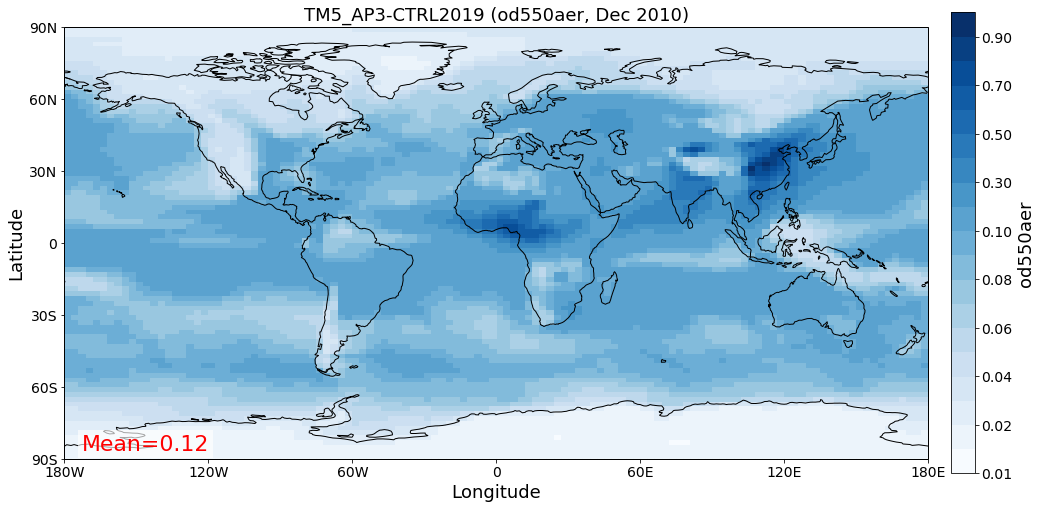

In [11]:
model_data.quickplot_map(11);

#### Branching off: Converting `GriddedData` to `iris.Cube` or `xarray.DataArray`

**Actually**, the `GriddedData` object is based on the `iris.Cube` object which can be accessed via the `cube` attr:

In [12]:
cube = model_data.cube

In [13]:
type(cube)

iris.cube.Cube

In [14]:
cube

<iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 12; latitude: 90; longitude: 120)>

In [15]:
try: # pyaerocom >= 0.8.1
    data_arr = model_data.to_xarray()
except: # pyaerocom < 0.8.1
    print('Coming soon in pyaerocom v0.8.1')
    import xarray as xarr
    data_arr = xarr.DataArray.from_iris(model_data.cube)
data_arr

<xarray.DataArray 'od550aer' (time: 12, lat: 90, lon: 120)>
dask.array<filled, shape=(12, 90, 120), dtype=float32, chunksize=(12, 90, 120), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2010-01-15 12:00:00 ... 2010-12-15 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.5 4.5 7.5 10.5 13.5 ... 349.5 352.5 355.5 358.5
Attributes:
    standard_name:     atmosphere_optical_thickness_due_to_ambient_aerosol
    long_name:         Ambient Aerosol Optical Thickness at 550 nm
    institution:       Royal Netherlands Meteorological Institute, De Bilt, T...
    institute_id:      KNMI
    source:            TM5-mp, r1058: CTM ERA-Interim 3x2 34L
    model_id:          TM5
    references:        Van Noije, T.P.C., et al. (Geosci. Model Dev., 7, 2435...
    experiment_id:     AP3-CTRL2019
    project_id:        AeroCom Phase 3
    title:             TM5 model output prepared for AeroCom Phase 3
    Conventions:

#### Other methods of the `GriddedData` object that may be useful

- model_data.interpolate
- model_data.regrid
- model_data.crop
- model_data.resample_time
- model_data.sel

#### Extract data at a certain coordinate and plot timeseries

In [16]:
LON_ABISKO = 18.8312 #° E
LAT_ABISKO = 68.3495 #° N 
subset_abisko = model_data.sel(longitude=LON_ABISKO, latitude=LAT_ABISKO)
subset_abisko

pyaerocom.GriddedData
Grid data: <iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 12)>

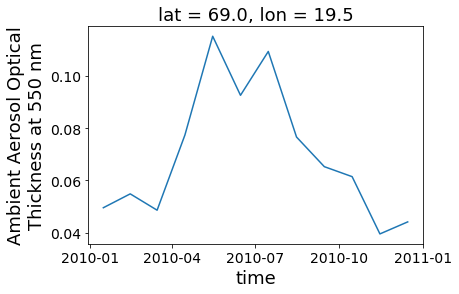

In [17]:
try: # pyaerocom >= 0.8.1
    subset_abisko.to_xarray().plot();
except: # pyaerocom < 0.8.1
    print('Coming soon in pyaerocom v0.8.1')
    import xarray as xarr
    data_arr = xarr.DataArray.from_iris(subset_abisko.cube).plot()

### Reading of ungridded data (`ReadUngridded` class)

- Ungridded data usually comprises timeseries data from different locations on earth and sampled at different times. 
- The data is often provided *per station* in form of text files (e.g. CSV).

![ungridded_api](pyaerocom_ungridded_io_flowchart.png)

#### Read Aeronet Sun version 3 level 2 data

In [18]:
pya.browse_database('Aeronet*V3*Lev2*')


Dataset name: AeronetSunV3Lev2.daily
Data directory: /home/notebook/shared-ns1000k/inputs/pyaerocom-testdata//obsdata/AeronetSunV3Lev2.0.daily/renamed
Supported variables: ['od340aer', 'od440aer', 'od500aer', 'od870aer', 'ang4487aer', 'ang4487aer_calc', 'od550aer']
Last revision: 20190920

Dataset name: AeronetSDAV3Lev2.daily
Data directory: /home/notebook/shared-ns1000k/inputs/pyaerocom-testdata//obsdata/Aeronet.SDA.V3L2.0.daily/renamed
Supported variables: ['od500gt1aer', 'od500lt1aer', 'od500aer', 'ang4487aer', 'od550aer', 'od550gt1aer', 'od550lt1aer']
Last revision: 20190920
Reading failed for AeronetSDAV3Lev2.AP. Error: NetworkNotImplemented('No reading class available yet for dataset AeronetSDAV3Lev2.AP')


In [19]:
OBS_ID = 'AeronetSunV3Lev2.daily'

In [20]:
obs_reader = pya.io.ReadUngridded(OBS_ID)
print(obs_reader)


Dataset name: AeronetSunV3Lev2.daily
Data directory: /home/notebook/shared-ns1000k/inputs/pyaerocom-testdata//obsdata/AeronetSunV3Lev2.0.daily/renamed
Supported variables: ['od340aer', 'od440aer', 'od500aer', 'od870aer', 'ang4487aer', 'ang4487aer_calc', 'od550aer']
Last revision: 20190920


##### Read in all stations (files) that have AOD data

In [21]:
obs_data = obs_reader.read(vars_to_retrieve=['od550aer'])
obs_data

UngriddedData <networks: ['AeronetSunV3Lev2.daily']; vars: ['od550aer']; instruments: ['sun_photometer'];No. of stations: 1230

### The `UngriddedData` object

#### Getting an overview

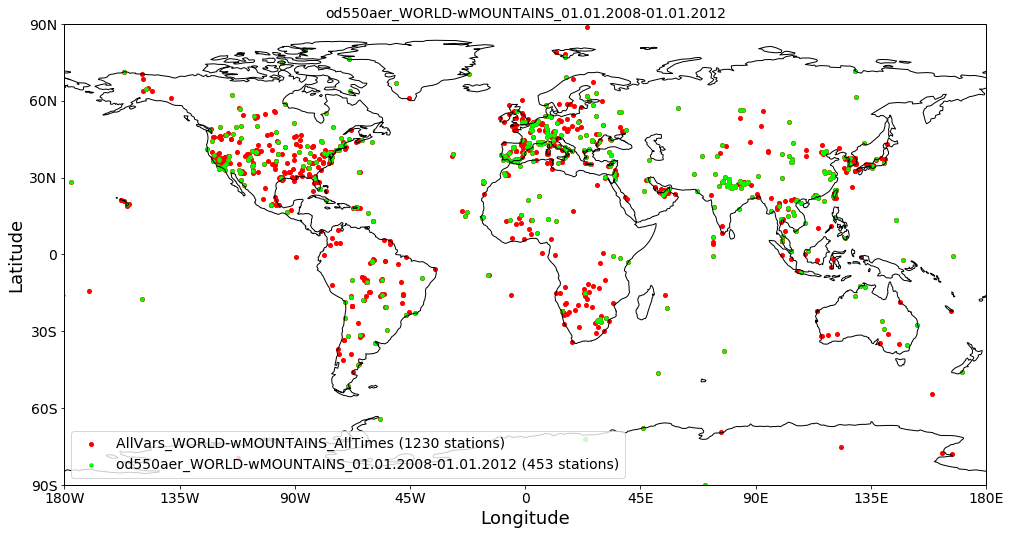

In [22]:
ax = obs_data.plot_station_coordinates(markersize=16)
ax = obs_data.plot_station_coordinates(var_name='od550aer', 
                                       start=2008, stop=2012, 
                                       markersize=12, color='lime', ax=ax)

#### Metadata -> available per file that was read in

In [23]:
len(obs_data.metadata)

1230

e.g. metadata of first file:

In [24]:
obs_data.metadata[420]

OrderedDict([('var_info',
              OrderedDict([('od550aer', OrderedDict([('units', '1')]))])),
             ('latitude', 19.932449999999996),
             ('longitude', 99.04539999999999),
             ('altitude', 1536.0),
             ('station_name', 'Doi_Ang_Khang'),
             ('PI', 'Brent_Holben'),
             ('ts_type', 'daily'),
             ('data_id', 'AeronetSunV3Lev2.daily'),
             ('variables', ['od550aer']),
             ('instrument_name', 'sun_photometer'),
             ('data_revision', '20190920')])

#### Filter data

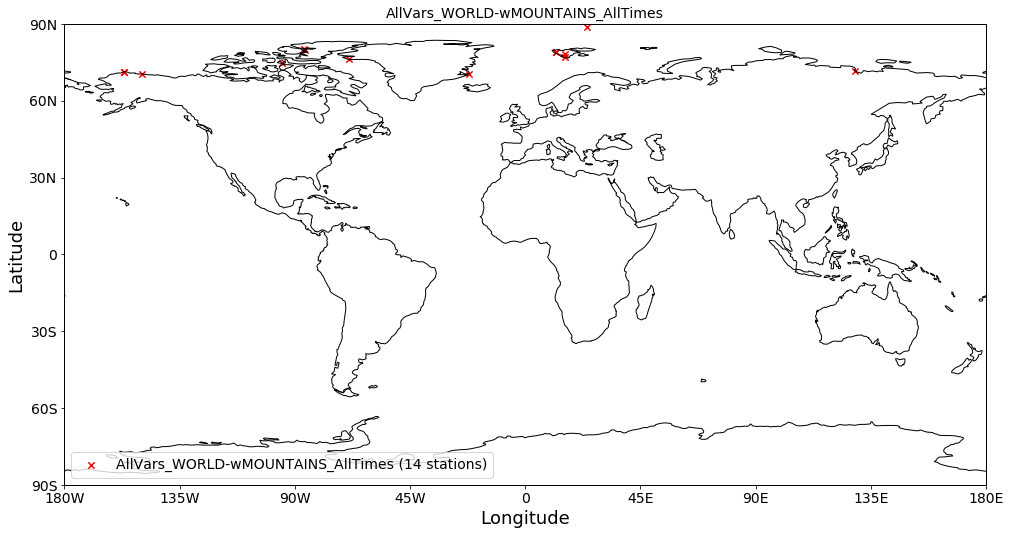

In [25]:
obs_arctic = obs_data.apply_filters(latitude=[70, 90])
obs_arctic.plot_station_coordinates(markersize=40, marker='x', color='r');

#### Extract data from individual stations (e.g. Lille)

In [26]:
lille_data = obs_data.to_station_data('*Lille*')
type(lille_data)

pyaerocom.stationdata.StationData

### Quick intro into `StationData`

- Essentially an extended python dictionary with some extras (e.g. you can use `.` and `[]` to access and assign attributes)
- contains timeseries data as `pandas.Series` 
- contains metadata

In [27]:
lille_data.keys()

odict_keys(['dtime', 'var_info', 'station_coords', 'data_err', 'overlap', 'data_flagged', 'filename', 'station_id', 'station_name', 'instrument_name', 'PI', 'country', 'ts_type', 'latitude', 'longitude', 'altitude', 'data_id', 'dataset_name', 'data_product', 'data_version', 'data_level', 'revision_date', 'website', 'ts_type_src', 'stat_merge_pref_attr', 'data_revision', 'od550aer'])

In [28]:
lille_data.longitude

3.1416669999999987

In [29]:
lille_data['latitude']

50.611667000000004

##### The actual timeseries data can be accessed as `pandas.Series` simply by using the variable name

In [30]:
lille_data.od550aer # THIS is exactly equivalent to the command lille_data['od550aer']

1995-06-30 12:00:00    0.403992
1995-07-01 12:00:00    0.695444
1995-07-04 12:00:00    0.213412
1995-07-07 12:00:00    0.757272
1995-07-08 12:00:00    1.072732
                         ...   
2019-06-16 12:00:00    0.061789
2019-06-17 12:00:00    0.100830
2019-06-18 12:00:00    0.130222
2019-06-20 12:00:00    0.046714
2019-06-21 12:00:00    0.074854
Length: 3399, dtype: float64

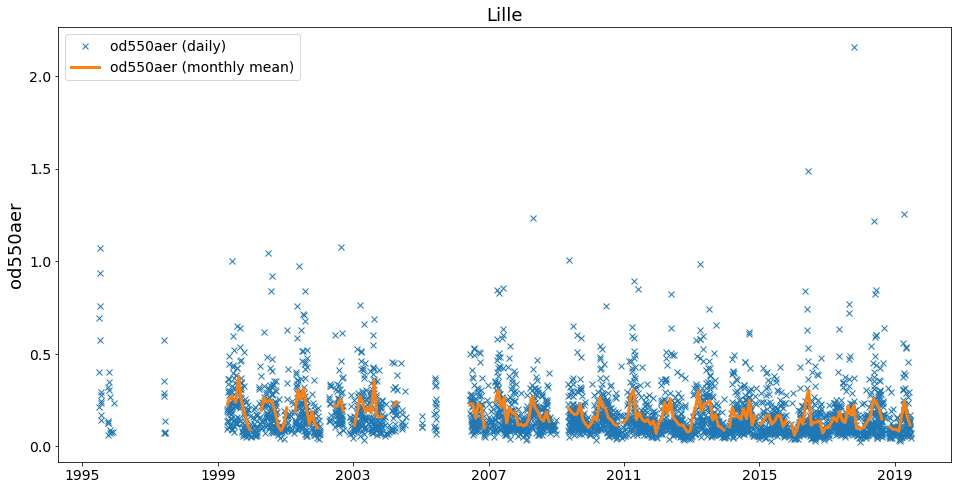

In [31]:
ax = lille_data.plot_timeseries(var_name='od550aer', marker='x', linestyle='none')
ax = lille_data.plot_timeseries(var_name='od550aer', ts_type='monthly', linestyle='-', lw=3, ax=ax)

### Colocation of model and obsdata

In [32]:
col_data = pya.colocation.colocate_gridded_ungridded(model_data, 
                                                     obs_data, 
                                                     ts_type='monthly',
                                                     start=2010)

In [33]:
help(pya.colocation.colocate_gridded_gridded)

Help on function colocate_gridded_gridded in module pyaerocom.colocation:

colocate_gridded_gridded(gridded_data, gridded_data_ref, ts_type=None, start=None, stop=None, filter_name=None, regrid_res_deg=None, remove_outliers=True, vert_scheme=None, harmonise_units=True, regrid_scheme='areaweighted', var_outlier_ranges=None, var_ref_outlier_ranges=None, update_baseyear_gridded=None, apply_time_resampling_constraints=None, min_num_obs=None, colocate_time=False, var_keep_outliers=True, var_ref_keep_outliers=False, **kwargs)
    Colocate 2 gridded data objects
    
    Todo
    ----
    - think about vertical dimension (vert_scheme input not used at the moment)
    
    Parameters
    ----------
    gridded_data : GriddedData
        gridded data (e.g. model results)
    gridded_data_ref : GriddedData
        reference dataset that is used to evaluate 
        :attr:`gridded_data` (e.g. gridded observation data)
    ts_type : str
        desired temporal resolution of colocated data (must b

In [34]:
type(col_data)

pyaerocom.colocateddata.ColocatedData

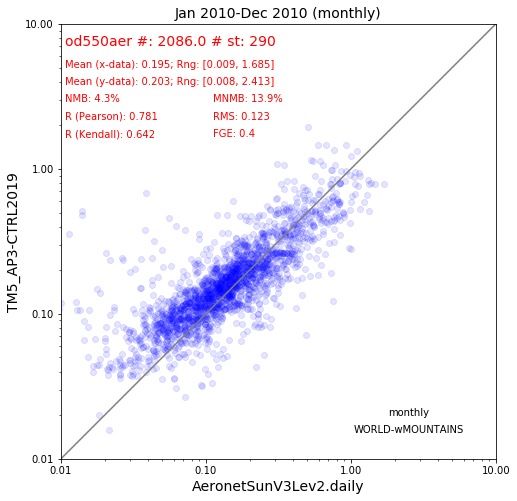

In [35]:
col_data.plot_scatter(marker='o', color='blue', alpha=0.1);

#### The `xarray.DataArray` object can be simply accessed via

In [36]:
col_data.data

<xarray.DataArray 'od550aer' (data_source: 2, time: 12, station_name: 290)>
array([[[       nan, 0.11758773,        nan, ...,        nan,
                nan, 0.22213848],
        [       nan, 0.13212825,        nan, ..., 0.12098059,
                nan, 0.4297616 ],
        [       nan, 0.14685542,        nan, ..., 0.12334401,
                nan, 0.91985307],
        ...,
        [0.11797653, 0.11601176,        nan, ..., 0.05336442,
         0.03394842, 0.37093354],
        [0.13223569, 0.19505731,        nan, ...,        nan,
                nan, 0.26176478],
        [       nan,        nan,        nan, ...,        nan,
                nan, 0.37904951]],

       [[0.14947775, 0.14656237, 0.16371733, ..., 0.08020622,
         0.03766838, 0.23015726],
        [0.14588432, 0.2863543 , 0.20080711, ..., 0.11745247,
         0.06611011, 0.46402201],
        [0.19967574, 0.28439081, 0.91542172, ..., 0.13032669,
         0.05874216, 1.46623838],
        ...,
        [0.21575473, 0.23416109,

#### Save `ColocatedData` object to NetCDF

In [37]:
col_data.savename_aerocom

'od550aer_REF-AeronetSunV3Lev2.daily_MOD-TM5_AP3-CTRL2019_20100101_20101231_monthly_WORLD-wMOUNTAINS'

In [38]:
col_data.to_netcdf('.')

##### ... and from there, Sara, Diego, Anne et al. have provided you with the perfect introduction.

### High level colocation and creation of colocated NetCDF files 

The example above did essentially the following steps:

- Find a model and variable of interest
- Find a corresponding observation network that measures that variable
- Load both model and obsdata for this variable into `GriddedData` and `UngriddedData`, respectively
- Colocate the model to the observation locations and create `ColocatedData` object
- Save the colocated data object as NetCDF file

**All these steps can be done with a one-liner in pyaerocom using the `Colocator` class**

Colocate the same model and observation network but now use the Angstrom exponent (ang4487aer) instead of the AOD:

In [39]:
colocator = pya.Colocator(model_id=DATA_ID,
                          obs_id=OBS_ID,
                          obs_vars='ang4487aer', 
                          ts_type='monthly',
                          start=2010, 
                          basedir_coldata='.',
                          reanalyse_existing=True,
                          save_coldata=True)
colocator.run()

Reading files 1-124 of 1230 (ReadAeronetSunV3) | 00:05:30 (delta = 0 s')
Reading file 0 of 1230 (ReadAeronetSunV3)
Reading files 124-247 of 1230 (ReadAeronetSunV3) | 00:05:33 (delta = 3 s')
Reading file 123 of 1230 (ReadAeronetSunV3)
Reading files 247-370 of 1230 (ReadAeronetSunV3) | 00:05:36 (delta = 2 s')
Reading file 246 of 1230 (ReadAeronetSunV3)
Reading files 370-493 of 1230 (ReadAeronetSunV3) | 00:05:38 (delta = 2 s')
Reading file 369 of 1230 (ReadAeronetSunV3)
Reading files 493-616 of 1230 (ReadAeronetSunV3) | 00:05:42 (delta = 3 s')
Reading file 492 of 1230 (ReadAeronetSunV3)
Reading files 616-739 of 1230 (ReadAeronetSunV3) | 00:05:46 (delta = 4 s')
Reading file 615 of 1230 (ReadAeronetSunV3)
Reading files 739-862 of 1230 (ReadAeronetSunV3) | 00:05:51 (delta = 4 s')
Reading file 738 of 1230 (ReadAeronetSunV3)
Reading files 862-985 of 1230 (ReadAeronetSunV3) | 00:05:55 (delta = 4 s')
Reading file 861 of 1230 (ReadAeronetSunV3)
Reading files 985-1108 of 1230 (ReadAeronetSunV3) | 

The `Colocator` objects stores all `ColocatedData` objects that were created in it's `data` attribute, which is a nested dictionary, organised via `model_id` and `var_name`:

In [40]:
colocator.data['TM5_AP3-CTRL2019']['ang4487aer']

<xarray.DataArray 'ang4487aer' (data_source: 2, time: 12, station_name: 264)>
array([[[       nan, 1.128966  ,        nan, ...,        nan,
                nan, 0.25999457],
        [       nan, 0.89081575,        nan, ..., 1.12947156,
                nan, 0.30509289],
        [       nan, 1.12122509,        nan, ..., 1.14267986,
                nan, 0.13727079],
        ...,
        [0.97128121, 1.2908889 ,        nan, ..., 1.56412958,
         1.0926709 , 0.39523561],
        [1.34621412, 0.934353  ,        nan, ...,        nan,
                nan, 0.49452866],
        [       nan,        nan,        nan, ...,        nan,
                nan, 0.4892751 ]],

       [[0.86711586, 0.73773724, 0.52013141, ..., 1.39102662,
         1.35547209, 0.62231678],
        [0.98289979, 0.30570188, 0.58608049, ..., 1.23340809,
         1.23590493, 0.44316554],
        [0.57381302, 0.59244061, 0.15318914, ..., 1.31365597,
         1.16984105, 0.19862083],
        ...,
        [0.8841635 , 0.8582107

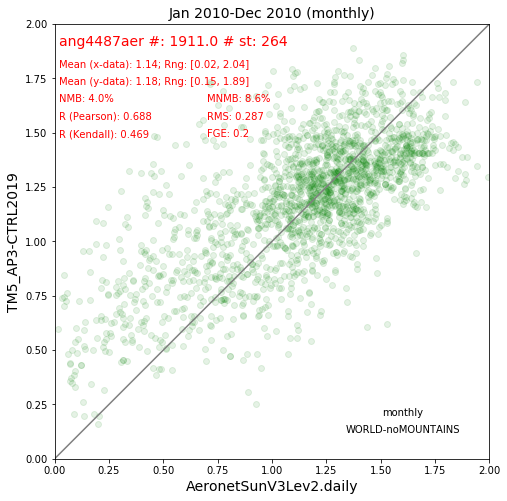

In [41]:
colocator.data[DATA_ID]['ang4487aer'].plot_scatter(marker='o', alpha=0.1, color='g');

##### Do the same for another model (e.g. CAM5.3-Oslo)

In [42]:
pya.browse_database('*CAM*')


Pyaerocom ReadGridded
---------------------
Data ID: ECMWF-IFS-CY45R1-CAMS-CTRL-met2010_AP3-CTRL
Data directory: /home/notebook/shared-ns1000k/inputs/pyaerocom-testdata/modeldata/ECMWF-IFS-CY45R1-CAMS-CTRL-met2010_AP3-CTRL/renamed
Available experiments: ['AP3-CTRL']
Available years: [1850, 2010]
Available frequencies ['3hourly' 'daily' 'monthly']
Available variables: ['abs550aer', 'clh', 'cll', 'clm', 'clt', 'depbc', 'depdu', 'depoa', 'depso2', 'depso4', 'depss', 'drybc', 'drydu', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'emibc', 'emidu', 'emioa', 'emiso2', 'emiss', 'iwp', 'loadbc', 'loaddu', 'loadlt10du', 'loadlt10ss', 'loadlt1du', 'loadlt1ss', 'loadlt25du', 'loadlt25ss', 'loadoa', 'loadso2', 'loadso4', 'loadss', 'lwp', 'od440aer', 'od550aer', 'od550bc', 'od550du', 'od550lt10du', 'od550lt10ss', 'od550lt1du', 'od550lt1ss', 'od550lt25du', 'od550lt25ss', 'od550oa', 'od550so4', 'od550ss', 'od865aer', 'prodso4', 'ps', 'sconcbc', 'sconcdu', 'sconcoa', 'sconcpm1', 'sconcpm10', 'sconcpm25', 'sc

In [43]:
ANOTHER_MODEL_ID = 'CAM53-Oslo_7310_MG15CLM45_5feb2017IHK_53OSLO_PD_UNTUNED'

In [44]:
colocator.run(model_id=ANOTHER_MODEL_ID)
colocator.data.keys()

dict_keys(['TM5_AP3-CTRL2019', 'CAM53-Oslo_7310_MG15CLM45_5feb2017IHK_53OSLO_PD_UNTUNED'])

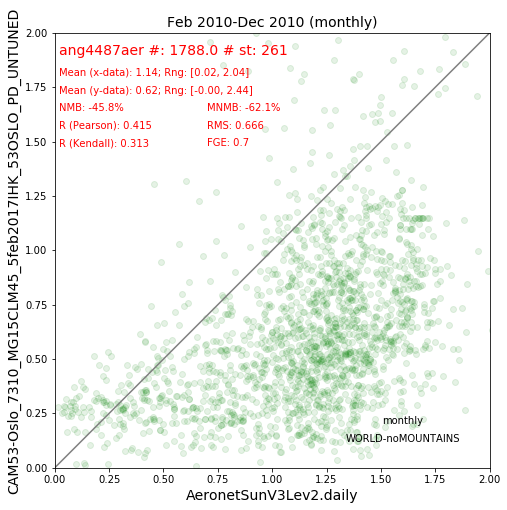

In [45]:
colocator.data[ANOTHER_MODEL_ID]['ang4487aer'].plot_scatter(marker='o', alpha=0.1, color='g');

#### Usage example: Compute AOD bias and plot bias map

In [46]:
_arr = col_data.data
mean_bias = ((_arr[1] - _arr[0])/_arr[0]).mean('time') * 100 #%
mean_bias

<xarray.DataArray 'od550aer' (station_name: 290)>
array([ 3.27914642e+01,  4.41977593e+01, -2.38407751e+01, -2.20405471e+01,
        4.87610882e+01, -1.09660243e+01,  6.09572635e+01,  6.95185320e+01,
        5.72888842e+01,  2.02739190e+00, -5.72097325e+01,  1.47671090e+01,
        4.29767724e+01,  4.29703426e+01, -3.04770598e+00,  3.25237489e+01,
        3.04941723e+01, -3.50740249e+01, -2.67254451e+00,  7.03229780e+01,
       -1.73058152e+01, -2.54449063e+01,  1.17741062e+01, -3.34088968e+00,
        5.11034734e+01, -5.49587609e+01,  3.12364125e+01,  1.41865023e+01,
        9.79946795e+00,  4.29076415e+01,  2.00427413e+02,  3.11295196e+01,
        1.25609668e+01, -2.99052611e+00,  3.79720939e+01,  4.11353824e+01,
        3.36367237e+01, -1.87316612e+01,  5.71903871e+00, -3.12985326e+01,
        9.64239738e+00,  3.87242518e+01,  3.28465450e+01, -1.34600998e+01,
        1.13944697e+02, -5.74046714e+00, -2.21200918e+01, -1.68933975e+01,
        2.14213839e+01, -1.57128817e+00,  1.633935

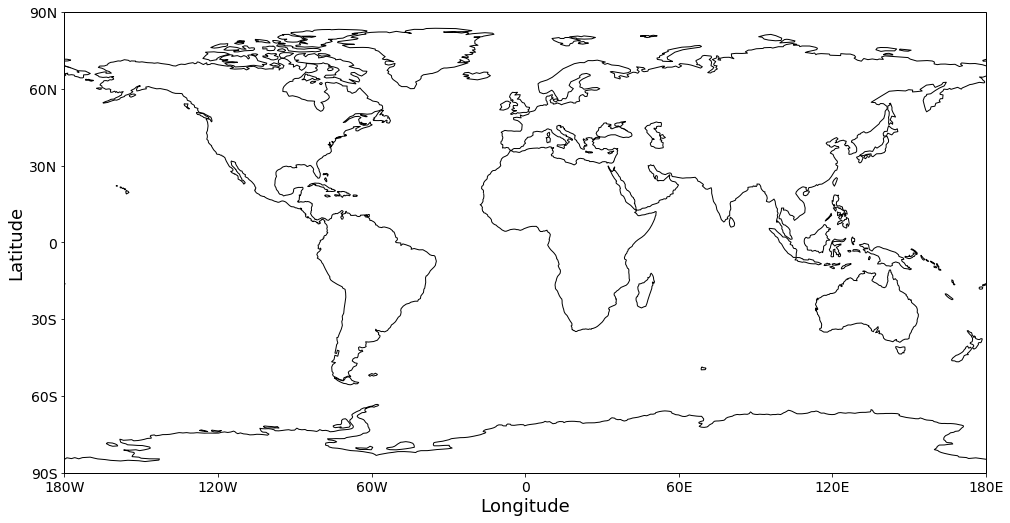

In [47]:
ax = pya.plot.mapping.init_map()

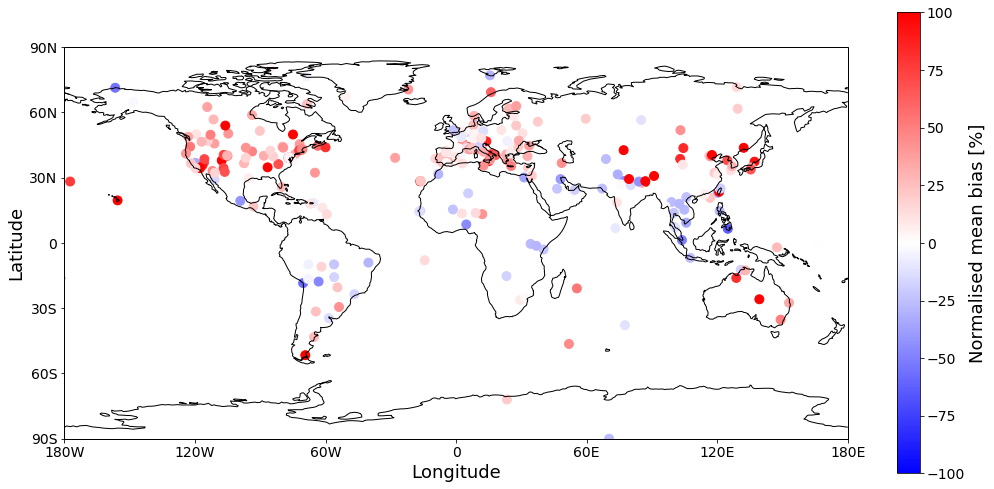

In [48]:
ax = pya.plot.mapping.init_map()
_sc = ax.scatter(mean_bias.longitude, mean_bias.latitude, marker='o', c=mean_bias.data, 
                 cmap='bwr', 
                 vmin=-100, vmax=100, s=80)
cb = plt.colorbar(_sc)
cb.ax.set_ylabel('Normalised mean bias [%]');

### Now if you colocate a lot of models against multiple different observations, you might end up here:

https://aerocom-evaluation.met.no/overall.php?project=aerocom&exp=PIII-optics2019